# Import & Load Dataset

In [ ]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
## Import Data
df = pd.read_csv("Customertravel.csv")

# EDA

In [ ]:
## Explore Data
df.info

<bound method DataFrame.info of      Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                          

In [ ]:
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [ ]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


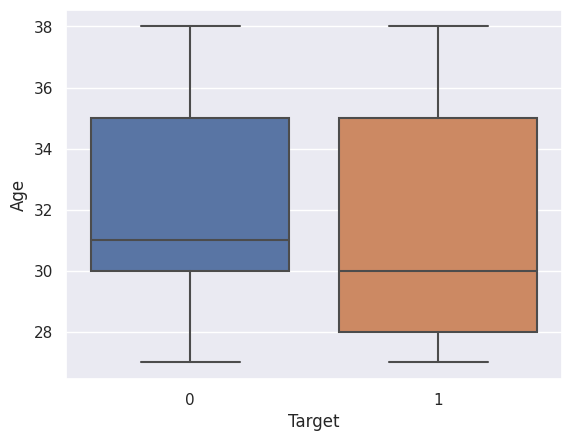

In [ ]:
#Explore avg Age by Target

sns.boxplot(data=df, x='Target', y='Age')
plt.show()

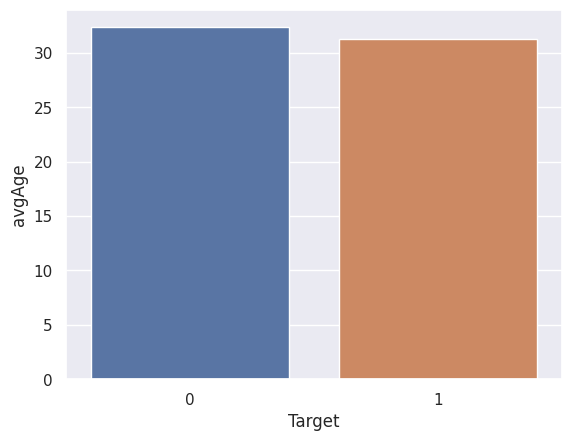

In [ ]:
#Explore avg Age by Target

df_by_target = df.groupby(by=['Target']).agg(
          avgAge=('Age','mean')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='avgAge')
plt.show()

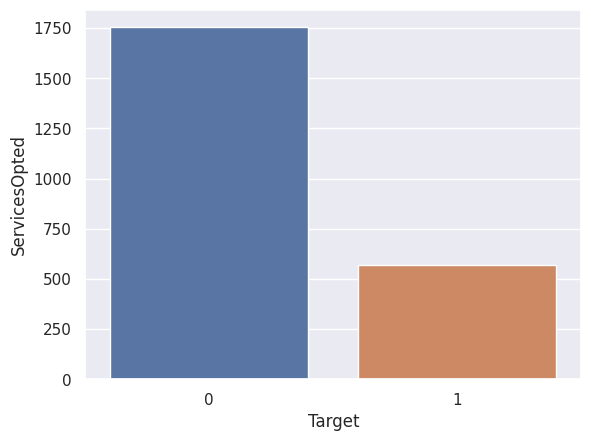

In [ ]:
#Explore ServicesOpted by Target
df_by_target = df.groupby(by=['Target']).agg(
               ServicesOpted=('ServicesOpted','sum')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='ServicesOpted')
plt.show()

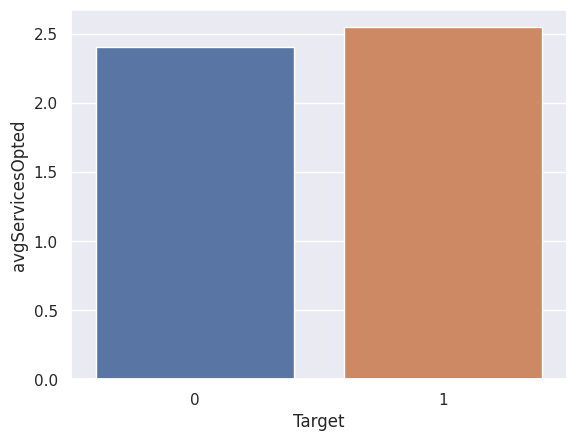

In [ ]:
#Explore avg ServicesOpted by Target
df_by_target = df.groupby(by=['Target']).agg(
               avgServicesOpted=('ServicesOpted','mean')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='avgServicesOpted')
plt.show()

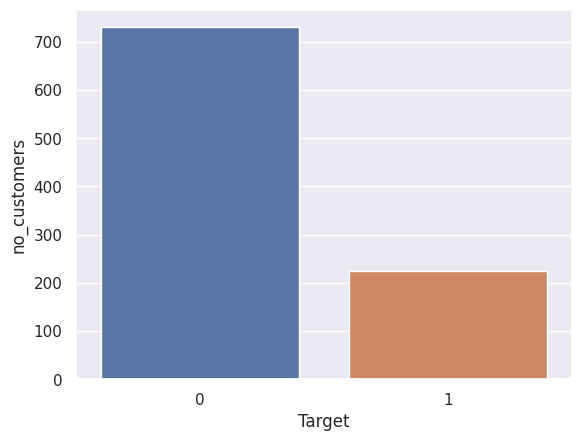

In [ ]:
#Explore No. of customers by Target
df_noCust_by_target = df.groupby(by=['Target']).agg(
          no_customers=('Target','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Target', y='no_customers')
plt.show()

<ipython-input-11-6f31f500597b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='FrequentFlyer'>

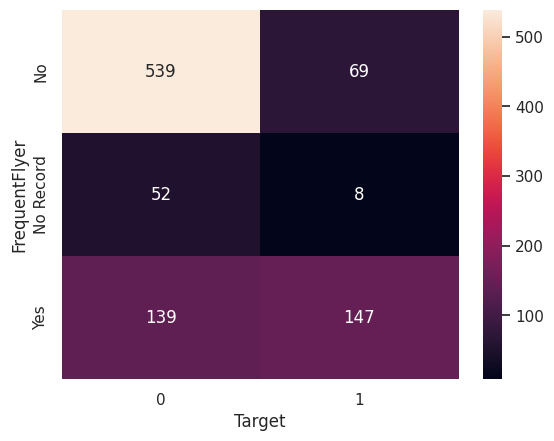

In [ ]:
#Explore FrequentFlyer by Target
df_FrequentFlyer_by_target = df.groupby(by=['FrequentFlyer', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')

sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

<ipython-input-12-1d2f3b46a5d5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('AnnualIncomeClass', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='AnnualIncomeClass'>

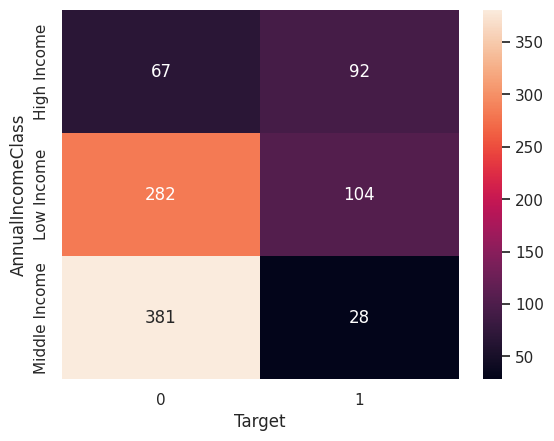

In [ ]:
#Explore AnnualIncomeClass by Target
df_FrequentFlyer_by_target = df.groupby(by=['AnnualIncomeClass', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('AnnualIncomeClass', 'Target', 'no_customers')
sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

<ipython-input-13-77d28f6bc761>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('AccountSyncedToSocialMedia', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='AccountSyncedToSocialMedia'>

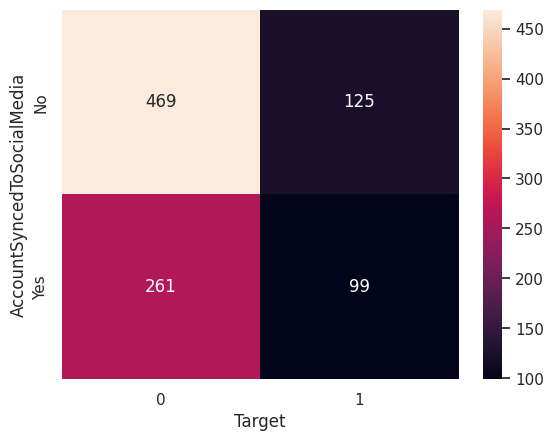

In [ ]:
#Explore AccountSyncedToSocialMedia by Target
df_FrequentFlyer_by_target = df.groupby(by=['AccountSyncedToSocialMedia', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('AccountSyncedToSocialMedia', 'Target', 'no_customers')
sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

<ipython-input-14-d3a46eb18b35>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('BookedHotelOrNot', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='BookedHotelOrNot'>

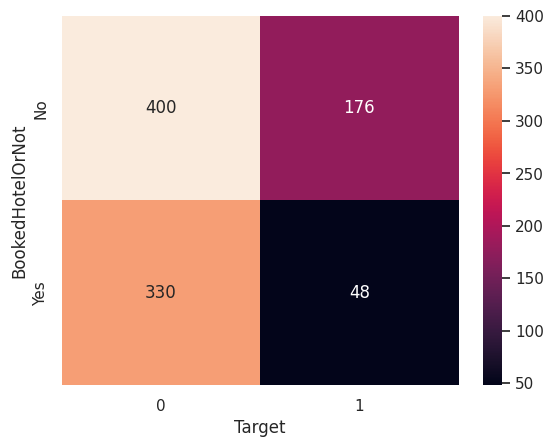

In [ ]:
#Explore BookedHotelOrNot by Target
df_FrequentFlyer_by_target = df.groupby(by=['BookedHotelOrNot', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('BookedHotelOrNot', 'Target', 'no_customers')
sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

#Data Processing

In [ ]:
cat_data = pd.DataFrame()

cat_data = pd.concat([cat_data, pd.get_dummies(df['FrequentFlyer'], prefix='FrequentFlyer')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['AnnualIncomeClass'], prefix='AnnualIncomeClass')], axis=1)

df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map({'Low Income':0,
                             'Middle Income':1,
                             'High Income':2})

cat_data = pd.concat([cat_data, df['AnnualIncomeClass']], axis=1)
cat_data

,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AnnualIncomeClass
0,1,0,0,0,0,1,1
1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1
3,1,0,0,0,0,1,1
4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...
949,0,0,1,0,1,0,0
950,1,0,0,0,0,1,1
951,1,0,0,0,0,1,1
952,1,0,0,0,1,0,0


In [ ]:
X = pd.concat([df[['Age', 'ServicesOpted']], cat_data], axis=1)
y = df['Target']
print(df['Target'])

0      0
1      1
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Target, Length: 954, dtype: int64


#Model Creation and Evaluation (XGBoost)

In [ ]:
# XGBoost
import xgboost as xgb

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [ ]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       291
           1       0.77      0.64      0.70        91

    accuracy                           0.87       382
   macro avg       0.83      0.79      0.81       382
weighted avg       0.86      0.87      0.86       382


Confusion Matrix: 



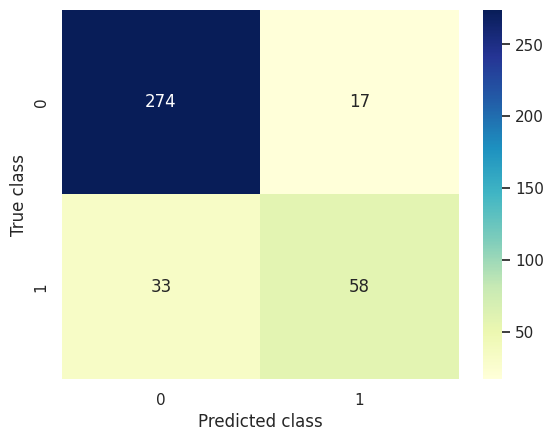

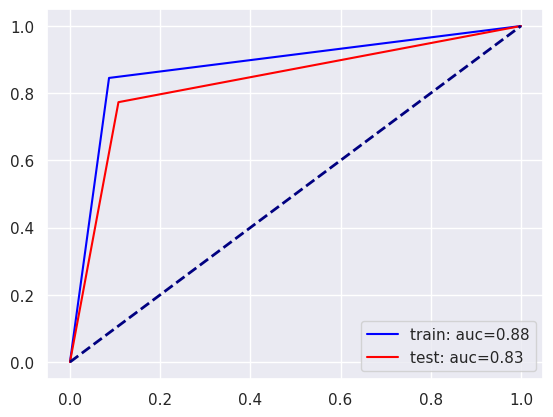

In [ ]:
#XGBoost
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

#XGBoost - Hyperparameter Tuning

In [ ]:
## building pipeline for hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Create a pipeline
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=9))
])

In [ ]:
## hyper parameter tuning - grid search

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': range(2, 4),
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [2],
  }
]
# Define cross validation
kfold = KFold(n_splits=5)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score), 'F1 score': 'f1_micro'}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       291
           1       0.79      0.25      0.38        91

    accuracy                           0.81       382
   macro avg       0.80      0.62      0.63       382
weighted avg       0.80      0.81      0.77       382


Confusion Matrix: 



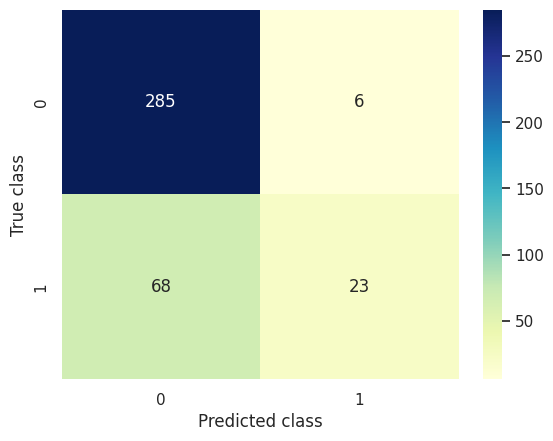

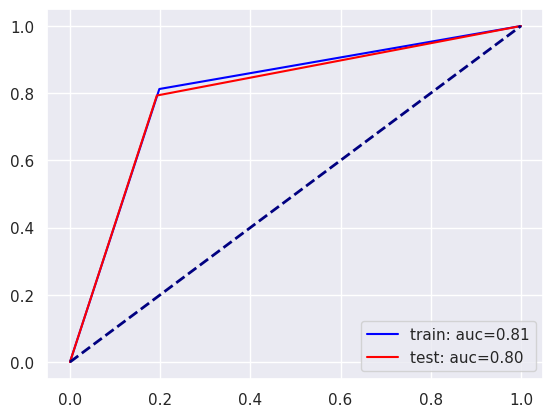

In [ ]:
modelXGB = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

#Feature Importance

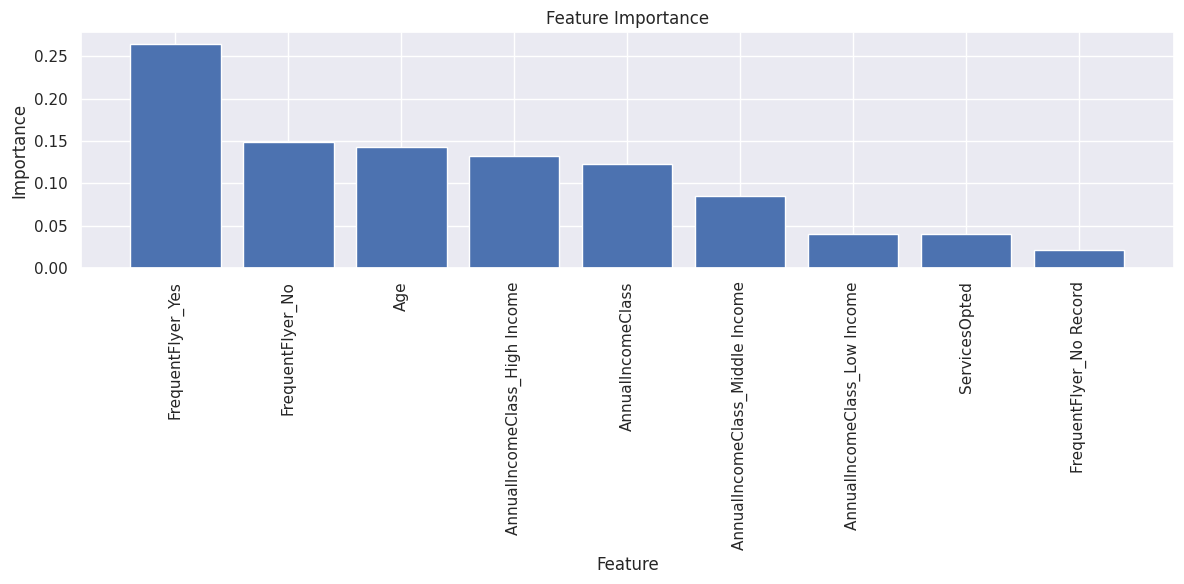

In [ ]:
# Get feature importances
feature_importances = modelXGB.feature_importances_

# Pair feature importances with feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances by importance value
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance values for plotting
sorted_feature_names, sorted_importance_values = zip(*sorted_feature_importance)

# Create a bar graph to visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names, sorted_importance_values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()